<div style="background-color: orange">
<a id='TableOfContents'></a>
    <b><u><i><h1 style='text-align: center'>
        Table of Contents
    </h1></i></u></b>
<li><a href='#imports'>Imports</a></li>
<li><a href='#store'>Store Set</a></li>
<li><a href='#germany'>Germany Set</a></li>

<div style='background-color: orange'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align: center'>
        Imports
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [1]:
# Vectorization and dataframing
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Datasets
import vega_datasets as data

# .py file
import acquire as a
import prepare as p

<div style='background-color: orange'>
<a id='store'></a>
    <b><u><i><h1 style='text-align: center'>
        Store Set
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#storeq1'>Question 1</a></li>
<li><a href='#storeq2'>Question 2</a></li>
<li><a href='#storeq3'>Question 3</a></li>
<li><a href='#storeq4'>Question 4</a></li>
<li><a href='#storeq5'>Question 5</a></li>
<li><a href='#storeq6'>Question 6</a></li>

Using your store items data:

In [2]:
store = a.acquire_store()
store.sample()

,item_id,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_id,store_address,store_zipcode,store_city,store_state
374426,21,Doctors Best,Doctors Best Best Curcumin C3 Complex 1000mg T...,8.09,374427,2013-04-07,45,6,1015 S WW White Rd,78220,San Antonio,TX


In [3]:
store.shape

(913000, 12)

---

<a id='storeq1'></a>
### 1. Convert date column to datetime format.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#store'>Store Set Top</a></li>

In [4]:
# Convert 'sale_date' column from object to datetime
store.sale_date = pd.to_datetime(store.sale_date)
store.dtypes

item_id                   int64
item_brand               object
item_name                object
item_price              float64
sale_id                   int64
sale_date        datetime64[ns]
sale_amount               int64
store_id                  int64
store_address            object
store_zipcode             int64
store_city               object
store_state              object
dtype: object

---

<a id='storeq2'></a>
### 2. Plot the distribution of sale_amount and item_price.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#store'>Store Set Top</a></li>

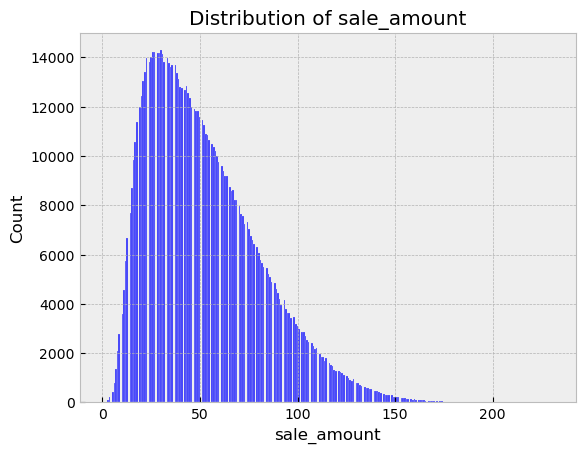

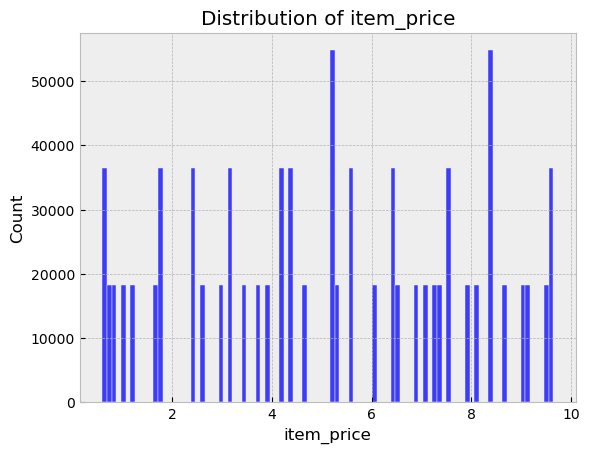

In [5]:
with plt.style.context('bmh'):
    sns.histplot(data=store, x='sale_amount')
    plt.title('Distribution of sale_amount')
    plt.show()
    sns.histplot(data=store, x='item_price')
    plt.title('Distribution of item_price')
    plt.show()

---

<a id='storeq3'></a>
### 3. Set the index to be the datetime variable.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#store'>Store Set Top</a></li>

In [6]:
store = store.set_index(store.sale_date)
store = store.drop(columns='sale_date')
store.sample()

,item_id,item_brand,item_name,item_price,sale_id,sale_amount,store_id,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,
2013-07-09,36,Deerfields Gluten Free,Rice Bran Gluten Free Dinner Rolls Plain,7.95,650246,58,7,12018 Perrin Beitel Rd,78217,San Antonio,TX


---

<a id='storeq4'></a>
### 4. Add a 'month' and 'day of week' column to your dataframe.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#store'>Store Set Top</a></li>

In [7]:
store['month'] = store.index.month
store['dayofweek'] = store.index.dayofweek
store.sample()

,item_id,item_brand,item_name,item_price,sale_id,sale_amount,store_id,store_address,store_zipcode,store_city,store_state,month,dayofweek
sale_date,,,,,,,,,,,,,
2017-02-19,21,Doctors Best,Doctors Best Best Curcumin C3 Complex 1000mg T...,8.09,381319,44,9,735 SW Military Dr,78221,San Antonio,TX,2,6


---

<a id='storeq5'></a>
### 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#store'>Store Set Top</a></li>

In [8]:
store['sales_total'] = store.sale_amount * store.item_price
store.sample()

,item_id,item_brand,item_name,item_price,sale_id,sale_amount,store_id,store_address,store_zipcode,store_city,store_state,month,dayofweek,sales_total
sale_date,,,,,,,,,,,,,,
2014-08-10,24,Smart Living,Smart Living Charcoal Lighter Fluid,5.34,429697,64,6,1015 S WW White Rd,78220,San Antonio,TX,8,6,341.76


---

<a id='storeq6'></a>
### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#store'>Store Set Top</a></li>

In [9]:
pyfile_store = p.prepare_store()
pyfile_store.sample()

,item_id,item_brand,item_name,item_price,sale_id,sale_amount,store_id,store_address,store_zipcode,store_city,store_state,month,dayofweek,sales_total
sale_date,,,,,,,,,,,,,,
2016-12-11,46,Mama Marys,Pizza Sauce,4.65,832271,35,6,1015 S WW White Rd,78220,San Antonio,TX,12,6,162.75


<div style='background-color: orange'>
<a id='germany'></a>
    <b><u><i><h1 style='text-align: center'>
        Germany Set
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#germanyq1'>Question 1</a></li>
<li><a href='#germanyq2'>Question 2</a></li>
<li><a href='#germanyq3'>Question 3</a></li>
<li><a href='#germanyq4'>Question 4</a></li>
<li><a href='#germanyq5'>Question 5</a></li>
<li><a href='#germanyq6'>Question 6</a></li>

Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

---

<a id='germanyq1'></a>
### 1. Convert date column to datetime format.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#germany'>Germany Set Top</a></li>

---

<a id='germanyq2'></a>
### 2. Plot the distribution of each of your variables.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#germany'>Germany Set Top</a></li>

---

<a id='germanyq3'></a>
### 3. Set the index to be the datetime variable.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#germany'>Germany Set Top</a></li>

---

<a id='germanyq4'></a>
### 4. Add a month and a year column to your dataframe.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#germany'>Germany Set Top</a></li>

---

<a id='germanyq5'></a>
### 5. Fill any missing values.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#germany'>Germany Set Top</a></li>

---

<a id='germanyq6'></a>
### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#germany'>Germany Set Top</a></li>